# Introduction:
#### Rice is the most important staple food crop of India, which feeds more than half of our population. It accounts for one-thrid population of foodgrains in the country. India is the second largetst producer of rice in the world after China. India depends greatly on rice for its economy and for meeting its food demands.
#### To ensure healthy and proper growth of the rice plants it is essential to detect any disease in time and prior to applying required treatment to the affected plants. Since manual detection of diseases costs a large amount of time and labour, it is inevitably prudent to have an automated system.Our work on rice leaf disease detection system using machine learning approaches.Three of the most common rice plant diseases namely leaf smut, bacterial leaf blight and brown spot diseases are detected in this work.

#### Thee data Contains 119 jpg images of various sizes of 3 classes
#### 0:Bacterial Leaf Blight (40 images)
#### 1:Brown Spot (40 images)
#### 2:Leaf Smut (39 images)

# Problem statement:
### Perform exploratory data analysis and build a Deep Learnig model to classify rice diseases from the rice-diseases-image-dataset.

# Domain Analysis:

#### Bacterial Leaf Blight: What is Bacterial leaf blight disease and how to Identify?
Bacterial blight is caused by Xanthomonas oryzae pv. oryzae. It causes wilting of seedlings and yellowing and drying of leaves.
It is commonly observed when strong winds and continuous heavy rains occur, allowing the disease-causing bacteria to easily spread through ooze droplets on lesions of infected plants.

* On older plants, lesions usually develop as water-soaked to yellow-orange stripes on leaf blades or leaf tips or on mechanically injured parts of leaves. Lesions have a wavy margin and progress toward the leaf base.
* On young lesions, bacterial ooze resembling a milky dew drop can be observed early in the morning. The bacterial ooze later on dries up and becomes small yellowish beads underneath the leaf.
* Old lesions turn yellow to grayish white with black dots due to the growth of various saprophytic fungi. On severely infected leaves, lesions may extend to the leaf sheath.

#### Brown Spot: What is brown spot disease and how to Identify?
Brown spot is a fungal disease that infects the coleoptile, leaves, leaf sheath, panicle branches, glumes, and spikelets. The disease can develop in areas with high relative humidity (86−100%) and temperature between 16 and 36°C. It is common in unflooded and nutrient-deficient soil, or in soils that accumulate toxic substances.

* Infected seedlings have small, circular, yellow brown or brown lesions that may girdle the coleoptile and distort primary and secondary leaves.
* Starting at tillering stage, lesions can be observed on the leaves. They are initially small, circular, and dark brown to purple-brown.
* Fully developed lesions are circular to oval with a light brown to gray center, surrounded by a reddish brown margin caused by the toxin produced by the fungi.

#### Leaf Smut: What is leaf Smut disease and how to Identify?
Leaf smut causes chalkiness of grains which leads to reduction in grain weight. It also reduces seed germination.
Rain, high humidity, and soils with high nitrogen content also favors disease development. Wind can spread the fungal spores from plant to plant.False smut is visible only after panicle exsertion. It can infect the plant during flowering stage.


* Plants infected with false smut have individual rice grain transformed into a mass of spore balls. These spore balls are initially orange, and then turn into greenish black when these mature.
* In most cases, not all spikelets of a panicle are affected, but spikelets neighboring smut balls are often unfilled.

## Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

In [2]:
import splitfolders

## Data collection

In [3]:
## specifying the input path
input_folder = 'C:/Users/User/Desktop/PRCP-1001-Rice leaf/Data'

## Splitting the data into train, test and validation set

In [4]:
splitfolders.ratio(input_folder, output = '2df',
                   seed = 1337, ratio = (.8, 0.1,0.1))

Copying files: 119 files [00:11, 10.40 files/s]


In [5]:
# Sorting the path of data into veriable
train_dir      = 'C:/Users/User/Desktop/PRCP-1001-Rice leaf/2df/train'  #Location of training images
validation_dir = 'C:/Users/User/Desktop/PRCP-1001-Rice leaf/2df/val' # Location of validation images
test_dir       = 'C:/Users/User/Desktop/PRCP-1001-Rice leaf/2df/test' # Location of test images

## Image Augmentation

In [6]:
# Generating batches of image data

train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=18,
    color_mode='rgb',
    class_mode='categorical')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=18,
    color_mode='rgb',
    class_mode='categorical')


Found 95 images belonging to 3 classes.
Found 11 images belonging to 3 classes.


## Visualizing train images

In [7]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 16 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])



In [8]:
# Making list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

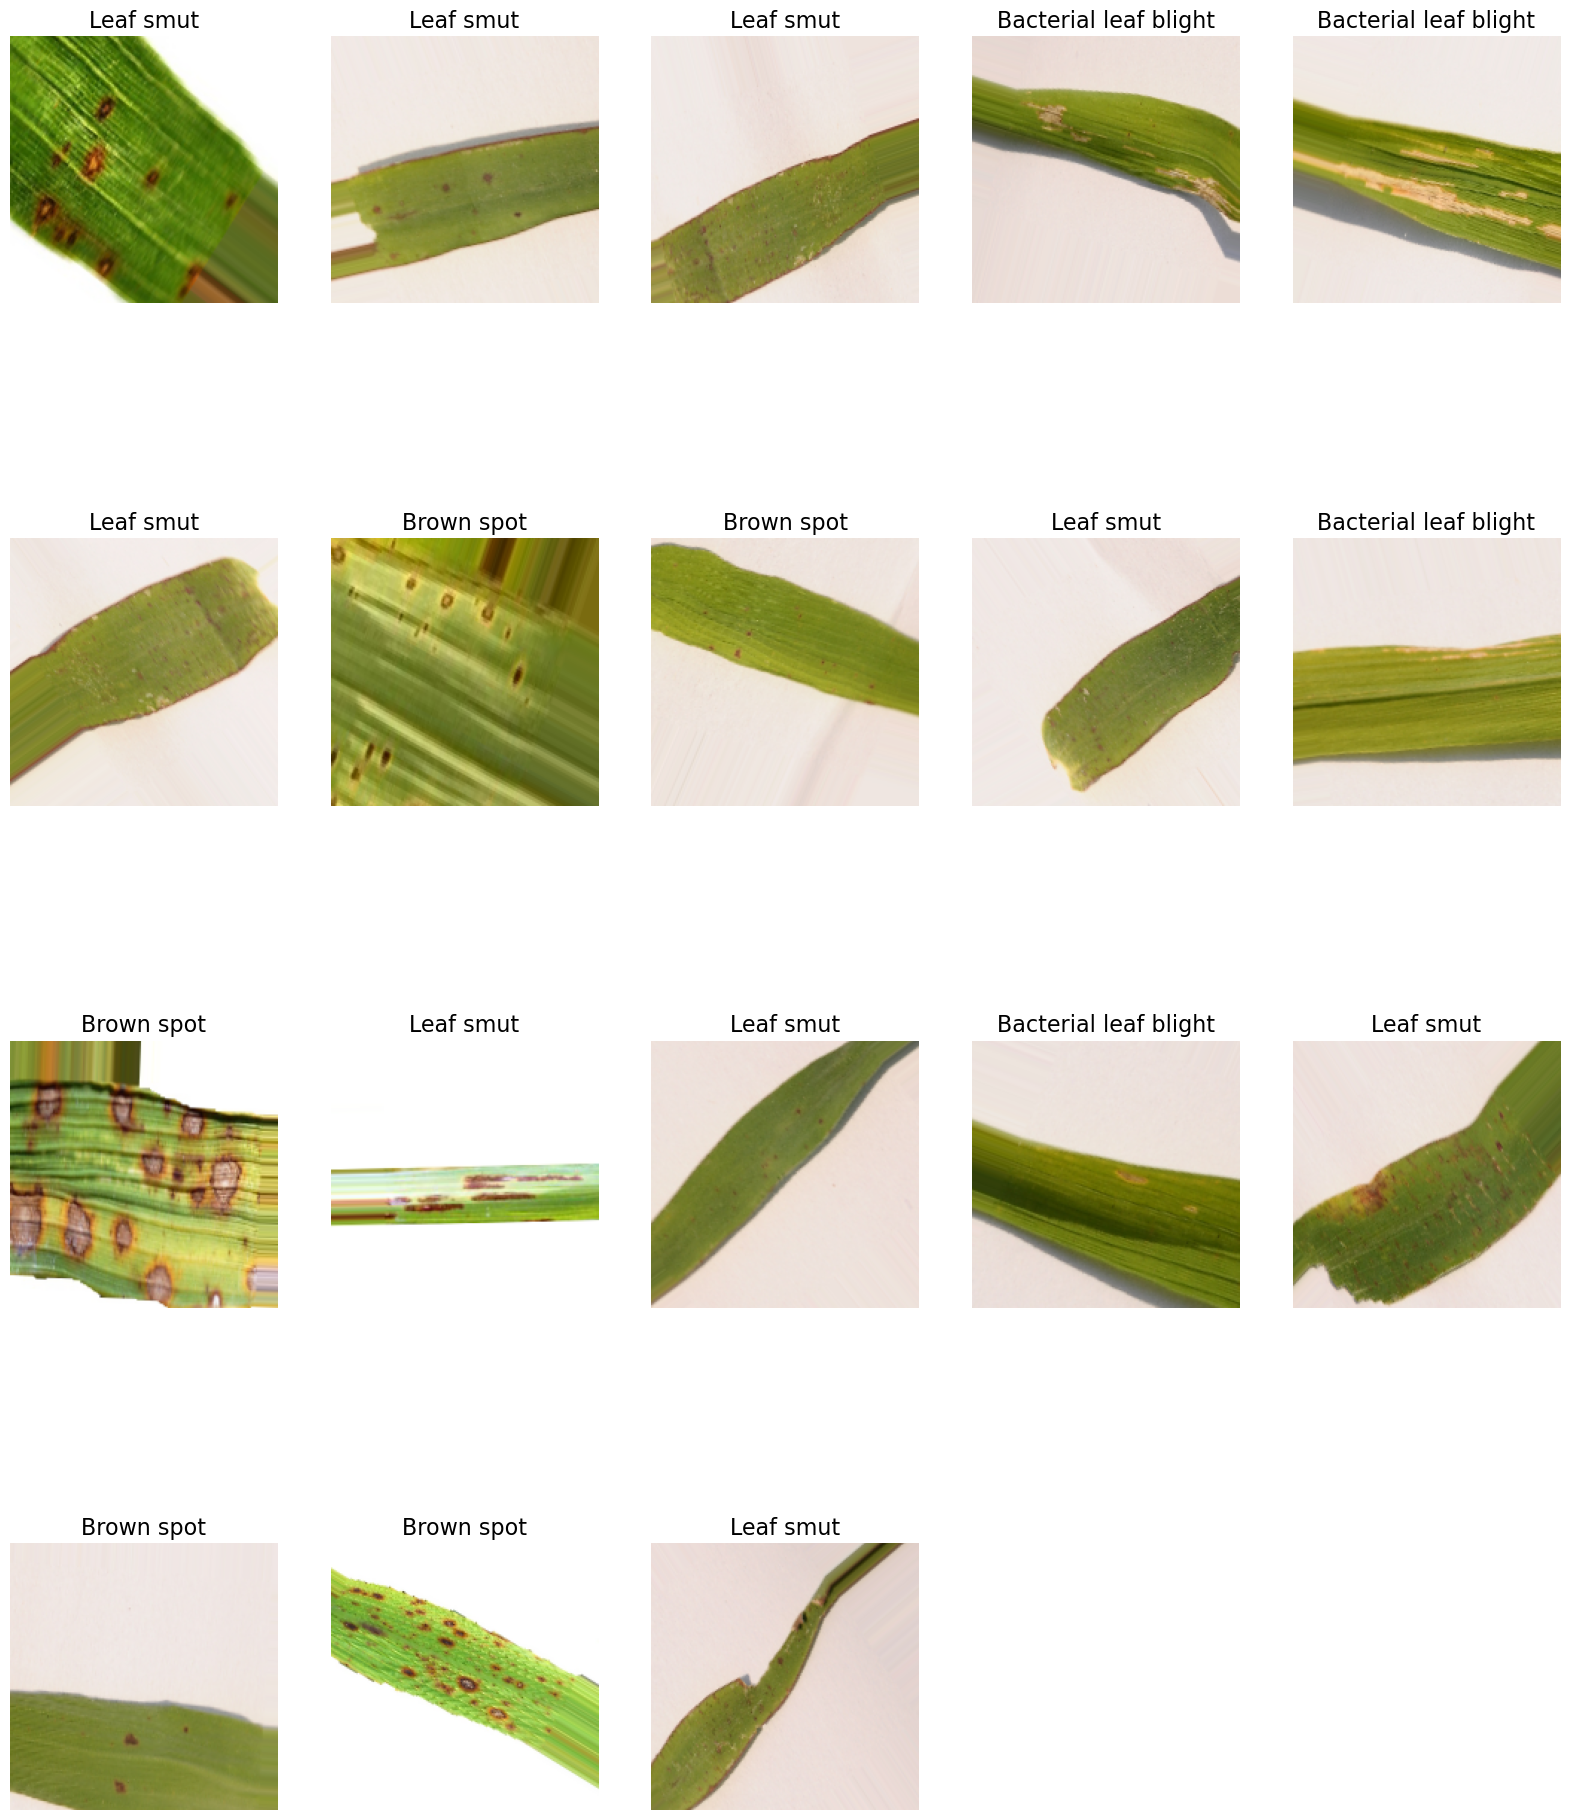

In [9]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

## Creating CNN model

In [10]:
from keras.layers.core.activation import Activation
from keras import models, layers  #importing layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())    #flattening the output 
model.add(layers.Dense(3, activation ='softmax'))  #defininng output layers with softmax activation function since its multi class classification

## Summary of the model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

## Compiling the model

In [12]:
from tensorflow.keras import optimizers
model.compile(
    loss      ='categorical_crossentropy',
    optimizer ='adam',
    metrics   =['accuracy'])

## Fitting the model

In [13]:
# Fitting the train data
    
history  = model.fit_generator(train_generator,
epochs   = 130, # epochs used to how many itertion (1fp + loss + 1bp)
validation_data = val_generator,)

C:\Users\User\AppData\Local\Temp\ipykernel_3868\3346873275.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history  = model.fit_generator(train_generator,


Epoch 1/130
6/6 [==============================] - 48s 6s/step - loss: 1.1488 - accuracy: 0.3263 - val_loss: 1.0894 - val_accuracy: 0.4545
Epoch 2/130
6/6 [==============================] - 35s 5s/step - loss: 1.1049 - accuracy: 0.3789 - val_loss: 1.0916 - val_accuracy: 0.3636
Epoch 3/130
6/6 [==============================] - 36s 5s/step - loss: 1.0996 - accuracy: 0.3368 - val_loss: 1.0800 - val_accuracy: 0.3636
Epoch 4/130
6/6 [==============================] - 37s 6s/step - loss: 1.0892 - accuracy: 0.3579 - val_loss: 1.0882 - val_accuracy: 0.2727
Epoch 5/130
6/6 [==============================] - 35s 7s/step - loss: 1.0823 - accuracy: 0.4211 - val_loss: 1.0751 - val_accuracy: 0.3636
Epoch 6/130
6/6 [==============================] - 35s 7s/step - loss: 1.0141 - accuracy: 0.5263 - val_loss: 1.0366 - val_accuracy: 0.5455
Epoch 7/130
6/6 [==============================] - 36s 5s/step - loss: 1.1549 - accuracy: 0.4211 - val_loss: 1.3253 - val_accuracy: 0.4545
Epoch 8/130
6/6 [==========

6/6 [==============================] - 37s 6s/step - loss: 0.3726 - accuracy: 0.8421 - val_loss: 0.8401 - val_accuracy: 0.8182
Epoch 60/130
6/6 [==============================] - 37s 6s/step - loss: 0.2835 - accuracy: 0.8632 - val_loss: 0.7860 - val_accuracy: 0.7273
Epoch 61/130
6/6 [==============================] - 37s 6s/step - loss: 0.1933 - accuracy: 0.9368 - val_loss: 0.6017 - val_accuracy: 0.9091
Epoch 62/130
6/6 [==============================] - 36s 6s/step - loss: 0.1948 - accuracy: 0.9263 - val_loss: 0.7904 - val_accuracy: 0.8182
Epoch 63/130
6/6 [==============================] - 37s 5s/step - loss: 0.1881 - accuracy: 0.9158 - val_loss: 0.9671 - val_accuracy: 0.9091
Epoch 64/130
6/6 [==============================] - 35s 6s/step - loss: 0.2211 - accuracy: 0.9158 - val_loss: 1.6135 - val_accuracy: 0.8182
Epoch 65/130
6/6 [==============================] - 36s 6s/step - loss: 0.2699 - accuracy: 0.8842 - val_loss: 0.8537 - val_accuracy: 0.7273
Epoch 66/130
6/6 [===============

6/6 [==============================] - 62s 12s/step - loss: 0.2372 - accuracy: 0.9158 - val_loss: 0.9463 - val_accuracy: 0.7273
Epoch 118/130
6/6 [==============================] - 57s 9s/step - loss: 0.2188 - accuracy: 0.9158 - val_loss: 0.7476 - val_accuracy: 0.5455
Epoch 119/130
6/6 [==============================] - 63s 11s/step - loss: 0.1797 - accuracy: 0.9368 - val_loss: 0.8021 - val_accuracy: 0.8182
Epoch 120/130
6/6 [==============================] - 45s 7s/step - loss: 0.1995 - accuracy: 0.9263 - val_loss: 1.0910 - val_accuracy: 0.8182
Epoch 121/130
6/6 [==============================] - 64s 10s/step - loss: 0.1922 - accuracy: 0.9474 - val_loss: 0.7139 - val_accuracy: 0.8182
Epoch 122/130
6/6 [==============================] - 38s 6s/step - loss: 0.2469 - accuracy: 0.9158 - val_loss: 0.5968 - val_accuracy: 0.7273
Epoch 123/130
6/6 [==============================] - 62s 11s/step - loss: 0.2178 - accuracy: 0.9158 - val_loss: 0.8413 - val_accuracy: 0.7273
Epoch 124/130
6/6 [====

## After training



*  Train accuracy      = 94%
*  Validation accuracy = 82%



## Model saving

In [14]:
model.save("gagana.rice_leaf")

INFO:tensorflow:Assets written to: gagana.rice_leaf\assets


INFO:tensorflow:Assets written to: gagana.rice_leaf\assets


## Plotting training & validation accuracy, training & validation loss.

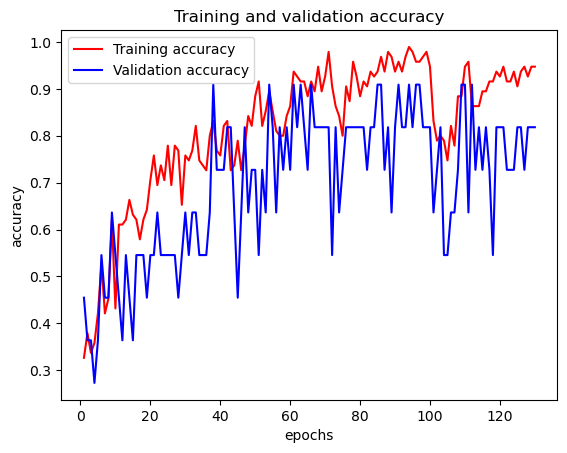

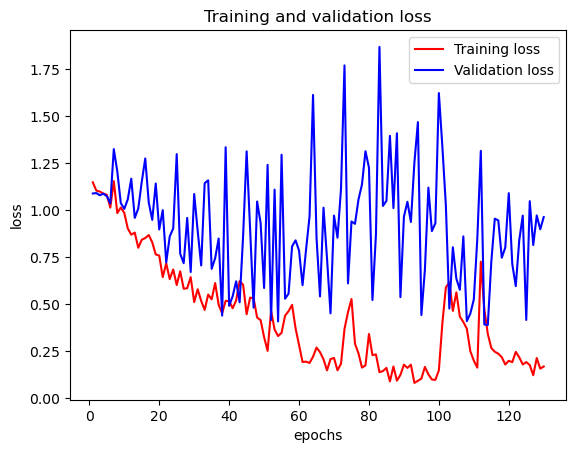

In [15]:
# Step:9 Plotting the training accuracy and validation accuracy
# Plotting the traning loss and validation loss

import matplotlib.pyplot as plt


accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## Summary of created model

In [16]:
model = tf.keras.models.load_model("gagana.rice_leaf")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

## Model Evaluation

In [17]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 13 images belonging to 3 classes.


In [18]:
model.evaluate(test_generator)

1/1 [==============================] - 4s 4s/step - loss: 1.2143 - accuracy: 0.8462


[1.2143440246582031, 0.8461538553237915]

## Visualization of test images

1/1 [==============================] - 0s 294ms/step


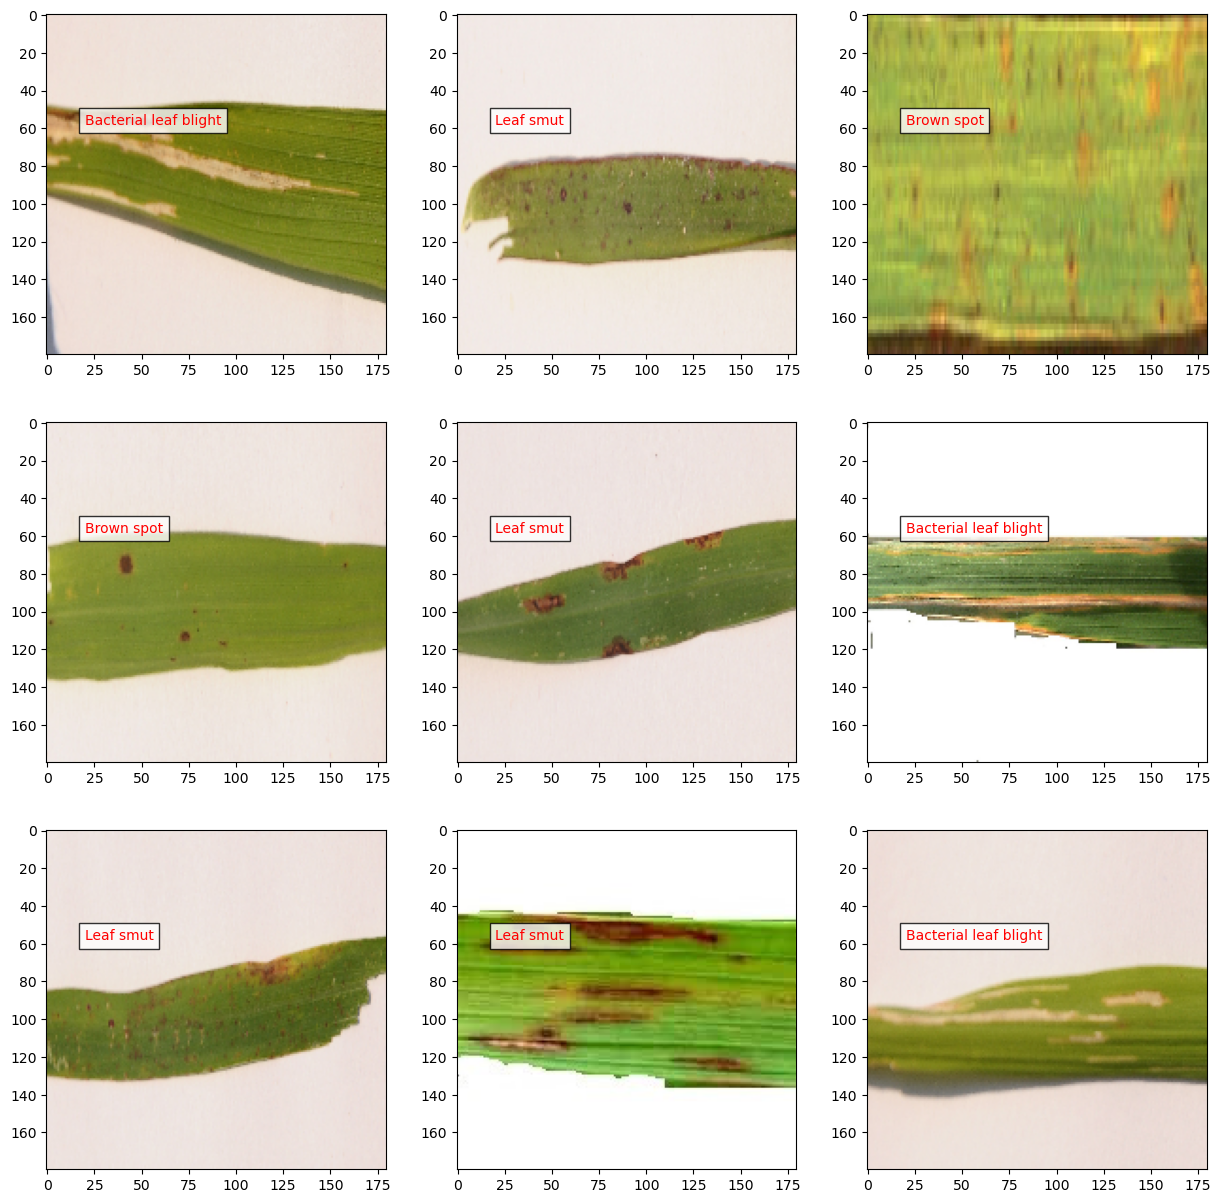

In [19]:
# Visualise the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

# Conclusion:


### The deep learning models perform well when compared with the machine learning methods. 

### CNN model with augmentation generated good accuracy score(82%) when epochs are increased.

### The algorithm could visually differentiate three classes with their names.



### Project Risks
- As the dataset is very small, the CNN model is tends to overfit at times
- There were fluctuations in the scores
- Though the model was able to give better accuracy in less number of epochs, yet the accuracy been reducing soon after attaining the maximum score